<a href="https://colab.research.google.com/github/shvnshnn02/PCVK_Ganjil_2023/blob/main/week_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 5

Agung Malik Al Qindy / 2141720114

Billie Faiqul Izzat / 214172020051

Shovinas Hanun / 2141720252

Import beberapa library berikut yang akan digunakan selama uji coba praktikum minggu ke-6 berikut.

In [29]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

Buatlah histogram citra seperti output histogram

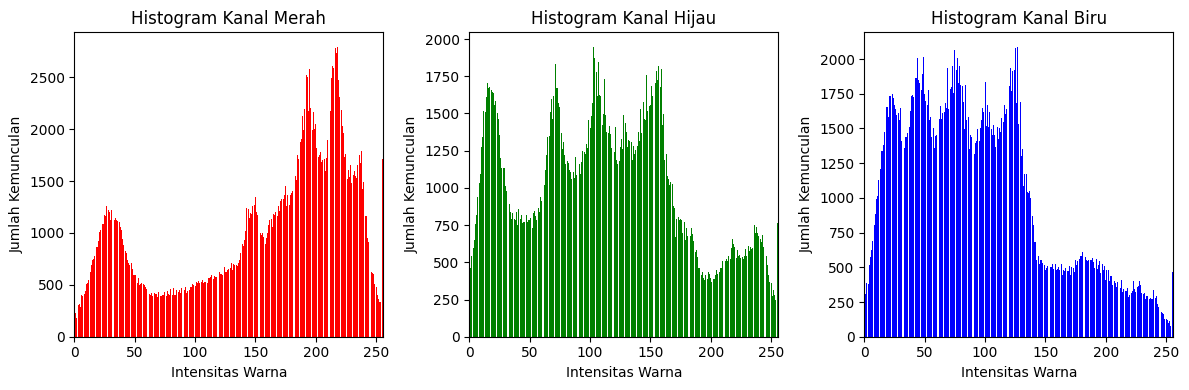

In [30]:
# Baca gambar "lena.jpg"
image = cv2.imread('/content/sample_data/lena.jpg')

# Pisahkan kanal warna
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Menghitung histogram untuk masing-masing kanal warna secara manual
histogram_red = np.zeros(256, dtype=int)
histogram_green = np.zeros(256, dtype=int)
histogram_blue = np.zeros(256, dtype=int)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        pixel_value_red = red_channel[i, j]
        pixel_value_green = green_channel[i, j]
        pixel_value_blue = blue_channel[i, j]

        histogram_red[pixel_value_red] += 1
        histogram_green[pixel_value_green] += 1
        histogram_blue[pixel_value_blue] += 1

# Menampilkan histogram masing-masing kanal warna dalam bentuk bar
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.bar(range(256), histogram_red, color='red')
plt.title('Histogram Kanal Merah')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.subplot(132)
plt.bar(range(256), histogram_green, color='green')
plt.title('Histogram Kanal Hijau')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.subplot(133)
plt.bar(range(256), histogram_blue, color='blue')
plt.title('Histogram Kanal Biru')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

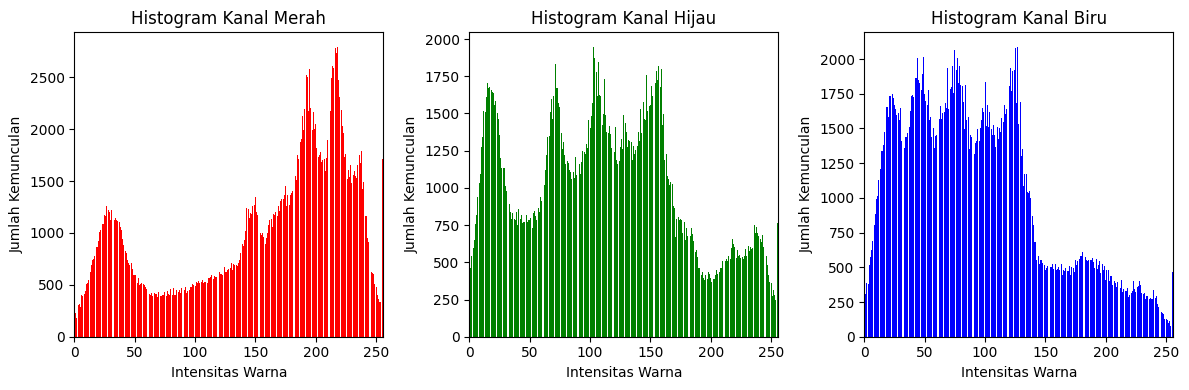

In [31]:
# Baca gambar "lena.jpg"
image = cv2.imread('/content/sample_data/lena.jpg')

# Pisahkan kanal warna
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Menghitung histogram untuk masing-masing kanal warna menggunakan numpy.histogram
histogram_red, _ = np.histogram(red_channel, bins=256, range=(0, 256))
histogram_green, _ = np.histogram(green_channel, bins=256, range=(0, 256))
histogram_blue, _ = np.histogram(blue_channel, bins=256, range=(0, 256))

# Menampilkan histogram masing-masing kanal warna dalam bentuk bar
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.bar(range(256), histogram_red, color='red')
plt.title('Histogram Kanal Merah')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.subplot(132)
plt.bar(range(256), histogram_green, color='green')
plt.title('Histogram Kanal Hijau')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.subplot(133)
plt.bar(range(256), histogram_blue, color='blue')
plt.title('Histogram Kanal Biru')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

Buatlah histogram citra seperti output histogram equalization dan juga tampilan gambar sebelum dan sesudah proses histogram equalization

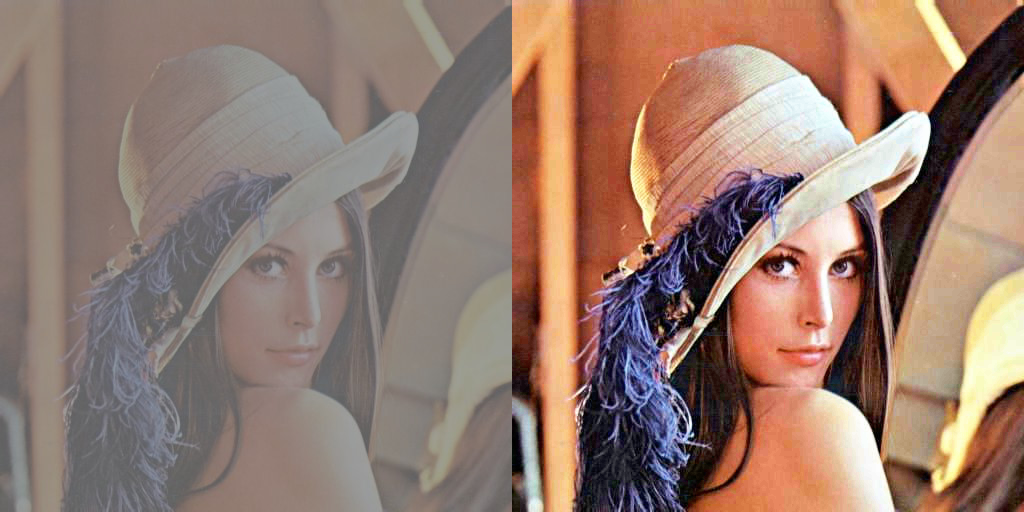

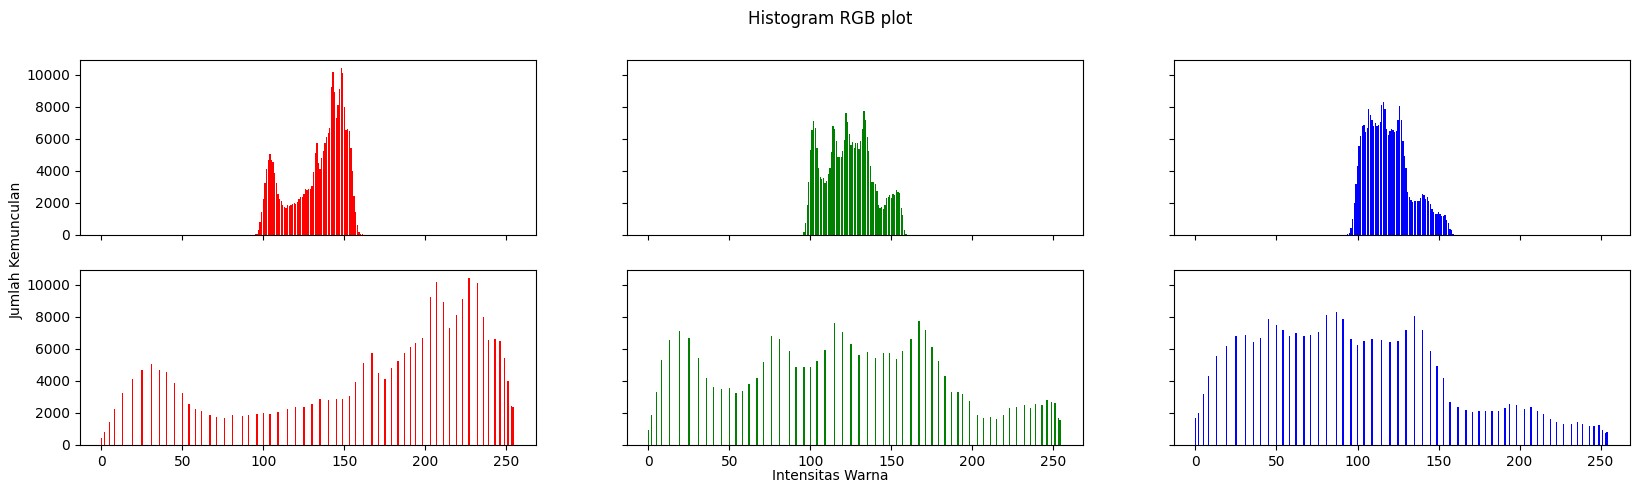

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Baca gambar "lena_lc.jpg"
img1 = cv2.imread('/content/sample_data/lena_lc.jpg')

def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

histo_asli = histog(img1)

# Convert to Numpy array
img_array = np.asarray(img1)

# Step 1: Normalized cumulative histogram
# Flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array / num_pixels

# Normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)

# Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)

# Step 3: Transformation
# Flatten image array into a list
img_list = list(img_array.flatten())

# Transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# Reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv2.hconcat((img1, img2))  # Concatenate images
cv2_imshow(final_frame)  # Display the final image using cv2_imshow

names = np.arange(256)
isgrayimg = np.array_equal(img1[:, :, 0], img1[:, :, 1]) and np.array_equal(img1[:, :, 0], img1[:, :, 2])
if not isgrayimg:
    fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_asli[1], color='green')
    axs[0, 2].bar(names, histo_asli[0], color='blue')
    axs[1, 0].bar(names, equal_histo[2], color='red')
    axs[1, 1].bar(names, equal_histo[1], color='green')
    axs[1, 2].bar(names, equal_histo[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[0], color='gray')
    axs[1].bar(names, equal_histo[0], color='gray')

plt.show()

Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

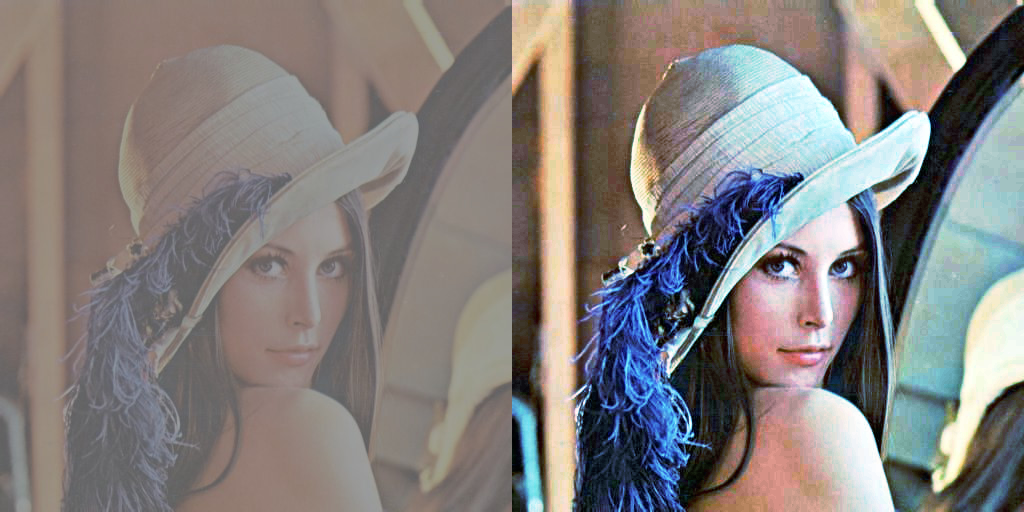

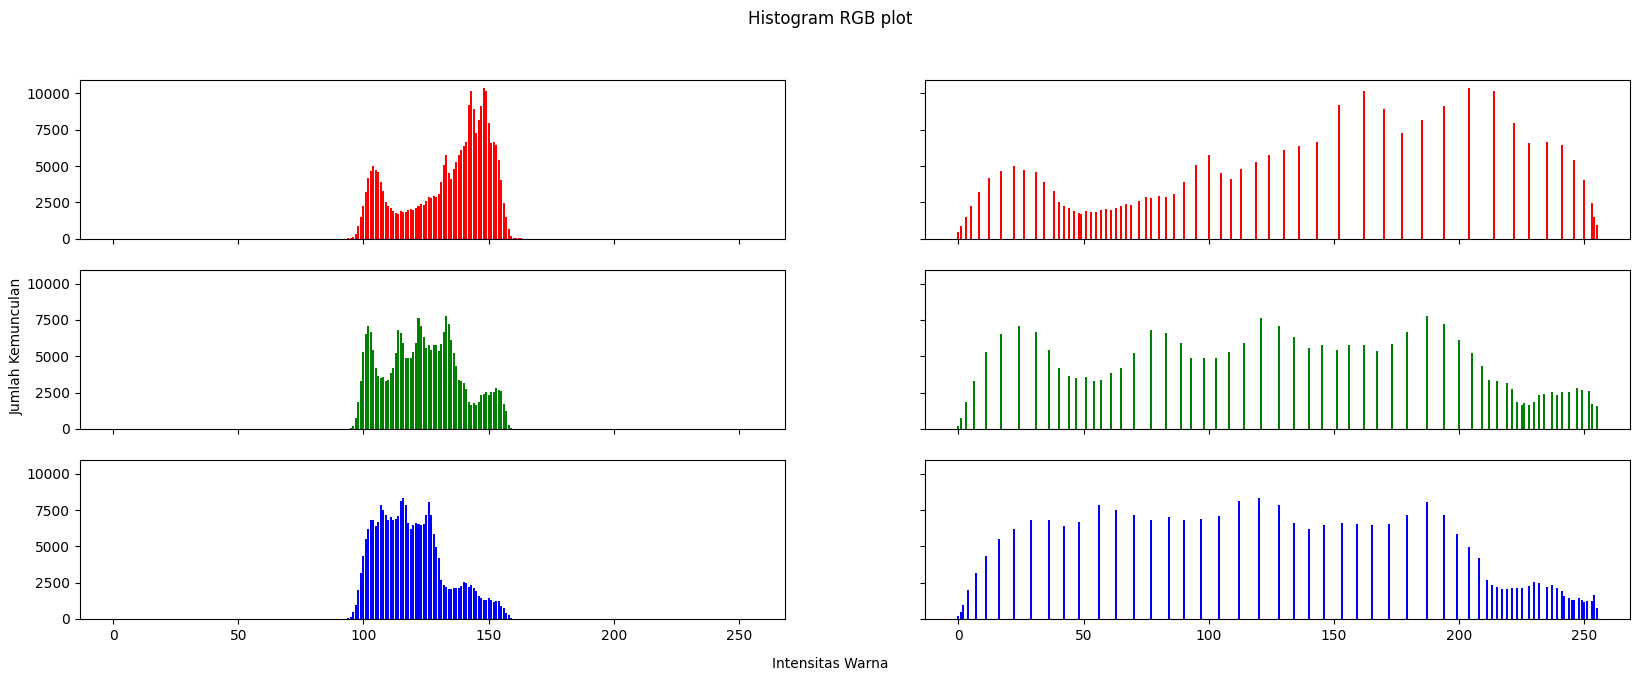

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Baca gambar "lena_lc.jpg"
img1 = cv2.imread('/content/sample_data/lena_lc.jpg')

def histog(img1):
    height, width, depth = np.shape(img1)
    ax = np.zeros((3, 256))
    for y in range(0, height):
        for x in range(0, width):
            ax[0][img1[y][x][0]] += 1
            ax[1][img1[y][x][1]] += 1
            ax[2][img1[y][x][2]] += 1
    return ax

histo_asli = histog(img1)

# Split the image into individual color channels
blue_channel = img1[:, :, 0]
green_channel = img1[:, :, 1]
red_channel = img1[:, :, 2]

# Perform histogram equalization on each color channel
equalized_blue = cv2.equalizeHist(blue_channel)
equalized_green = cv2.equalizeHist(green_channel)
equalized_red = cv2.equalizeHist(red_channel)

# Merge the equalized color channels back into an RGB image
equalized_img = cv2.merge([equalized_blue, equalized_green, equalized_red])

# Calculate histograms for original and equalized images
histo_equalized = histog(equalized_img)

final_frame = cv2.hconcat((img1, equalized_img))  # Concatenate images
cv2_imshow(final_frame)  # Display the final image using cv2_imshow

names = np.arange(256)
isgrayimg = np.array_equal(blue_channel, green_channel) and np.array_equal(blue_channel, red_channel)
if not isgrayimg:
    fig, axs = plt.subplots(3, 2, figsize=[20, 7], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
    axs[0, 0].bar(names, histo_asli[2], color='red')
    axs[0, 1].bar(names, histo_equalized[2], color='red')
    axs[1, 0].bar(names, histo_asli[1], color='green')
    axs[1, 1].bar(names, histo_equalized[1], color='green')
    axs[2, 0].bar(names, histo_asli[0], color='blue')
    axs[2, 1].bar(names, histo_equalized[0], color='blue')
else:
    fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
    fig.suptitle('Histogram RGB plot')
    fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
    fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
    axs[0].bar(names, histo_asli[0], color='gray')
    axs[1].bar(names, histo_equalized[0], color='gray')

plt.show()

Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena_lc.jpg)

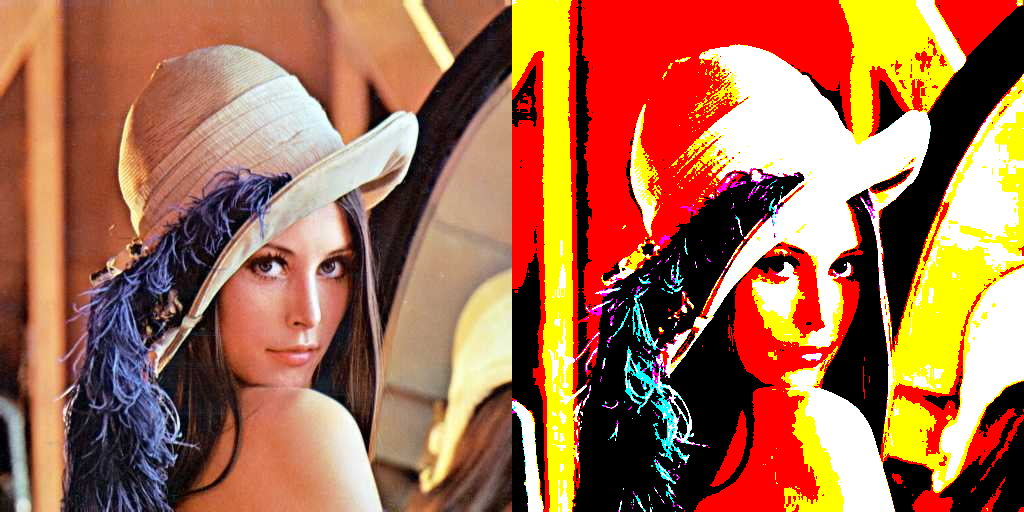

In [34]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Buat palet warna dengan 8 warna yang ditentukan
colors = {
    "black": (0, 0, 0),
    "green": (0, 255, 0),
    "yellow": (255, 255, 0),
    "blue": (0, 0, 255),
    "cyan": (0, 255, 255),
    "magenta": (255, 0, 255),
    "white": (255, 255, 255),
}

# Baca gambar "lena.jpg"
img = cv2.imread('/content/sample_data/lena.jpg')

# Salin gambar asli untuk ditampilkan di sebelah kiri
original_img = img.copy()

# Loop melalui setiap piksel gambar dan ganti warnanya sesuai dengan palet warna
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        pixel_color = tuple(img[x, y])
        min_dist = float('inf')
        nearest_color = None
        for name, color in colors.items():
            dist = np.linalg.norm(np.array(pixel_color) - np.array(color))
            if dist < min_dist:
                min_dist = dist
                nearest_color = color
        img[x, y] = nearest_color

# Tampilkan gambar asli di sebelah kiri dan gambar yang telah diubah di sebelah kanan
combined_img = np.hstack((original_img, img))
cv2_imshow(combined_img)

Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)

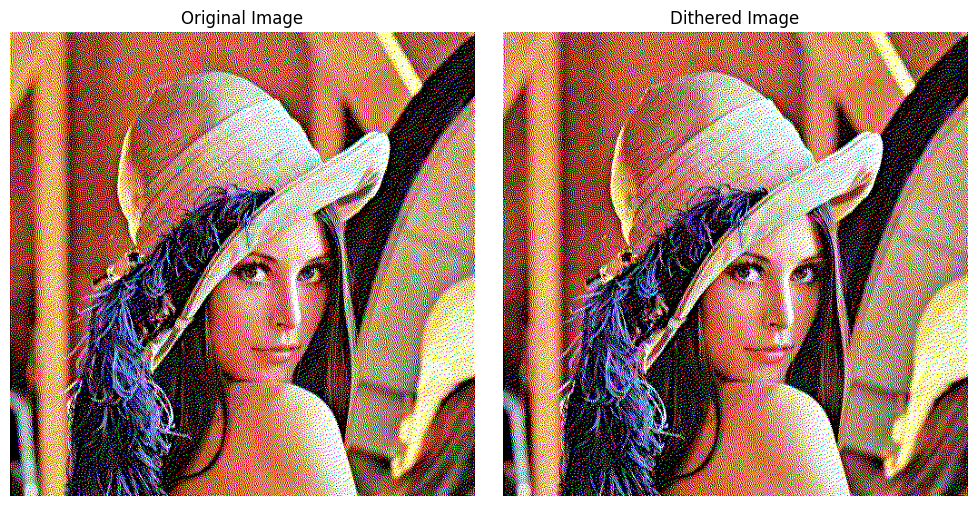

In [35]:
from PIL import Image
import matplotlib.pyplot as plt

def apply_dithering(image):
    width, height = image.size
    for y in range(height):
        for x in range(width):
            old_pixel = image.getpixel((x, y))
            new_pixel = quantize_pixel(old_pixel)
            image.putpixel((x, y), new_pixel)
            quant_error = calculate_quantization_error(old_pixel, new_pixel)
            distribute_error(image, x, y, quant_error)
    return image

def quantize_pixel(pixel):
    r, g, b = pixel
    new_r = round(r / 255) * 255
    new_g = round(g / 255) * 255
    new_b = round(b / 255) * 255
    return (new_r, new_g, new_b)

def calculate_quantization_error(old_pixel, new_pixel):
    r_old, g_old, b_old = old_pixel
    r_new, g_new, b_new = new_pixel
    quant_error_r = r_old - r_new
    quant_error_g = g_old - g_new
    quant_error_b = b_old - b_new
    return (quant_error_r, quant_error_g, quant_error_b)

def distribute_error(image, x, y, quant_error):
    width, height = image.size
    error_r, error_g, error_b = quant_error
    if x + 1 < width:
        new_pixel = image.getpixel((x + 1, y))
        image.putpixel((x + 1, y), (
            new_pixel[0] + (error_r * 7 // 16),
            new_pixel[1] + (error_g * 7 // 16),
            new_pixel[2] + (error_b * 7 // 16)
        ))
    if x - 1 >= 0 and y + 1 < height:
        new_pixel = image.getpixel((x - 1, y + 1))
        image.putpixel((x - 1, y + 1), (
            new_pixel[0] + (error_r * 3 // 16),
            new_pixel[1] + (error_g * 3 // 16),
            new_pixel[2] + (error_b * 3 // 16)
        ))
    if y + 1 < height:
        new_pixel = image.getpixel((x, y + 1))
        image.putpixel((x, y + 1), (
            new_pixel[0] + (error_r * 5 // 16),
            new_pixel[1] + (error_g * 5 // 16),
            new_pixel[2] + (error_b * 5 // 16)
        ))
    if x + 1 < width and y + 1 < height:
        new_pixel = image.getpixel((x + 1, y + 1))
        image.putpixel((x + 1, y + 1), (
            new_pixel[0] + (error_r * 1 // 16),
            new_pixel[1] + (error_g * 1 // 16),
            new_pixel[2] + (error_b * 1 // 16)
        ))

# Load the original input image
input_image_path = ('/content/sample_data/lena.jpg')
input_image = Image.open(input_image_path)

# Apply dithering
output_image = apply_dithering(input_image)

# Plotting the images
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(input_image)
plt.title('Original Image')
plt.axis('off')

# Plot the dithered image
plt.subplot(1, 2, 2)
plt.imshow(output_image)
plt.title('Dithered Image')
plt.axis('off')

# Display the images
# cv2_imshow(input_image_path)
plt.tight_layout()
plt.show()

Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

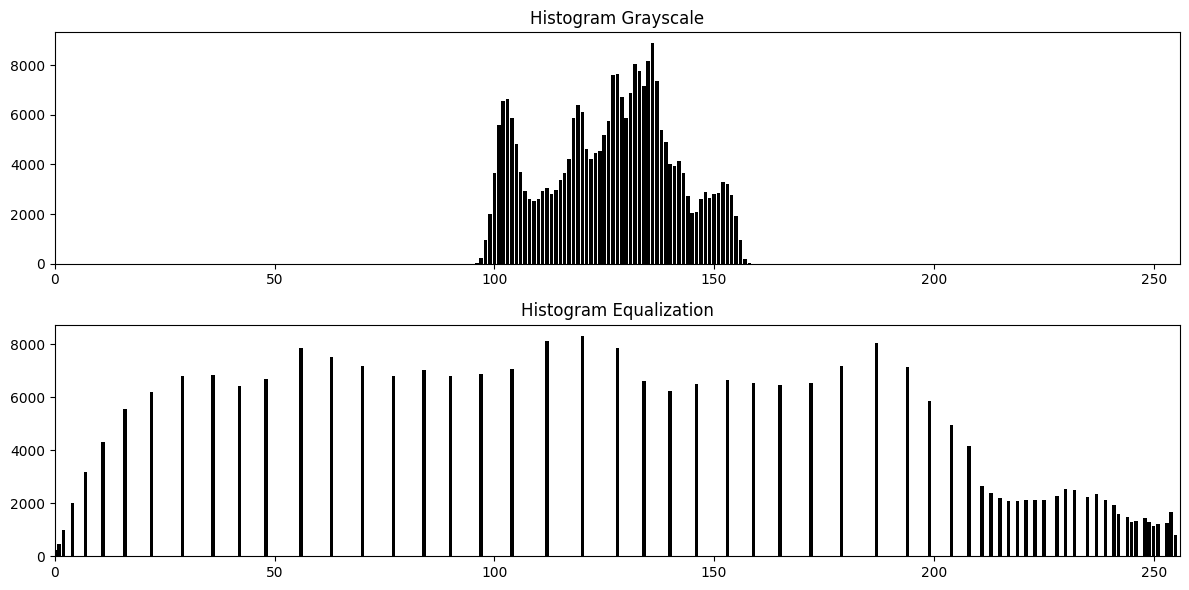

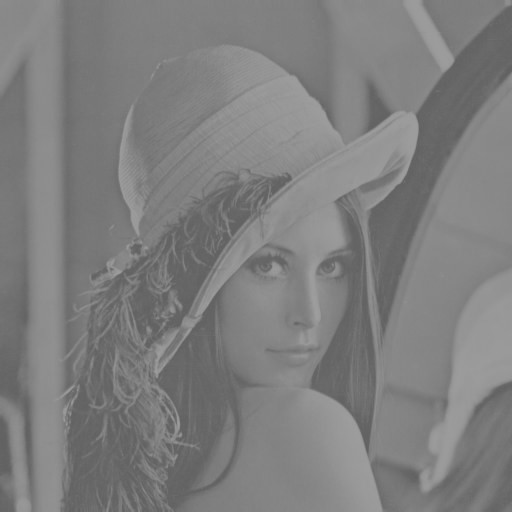

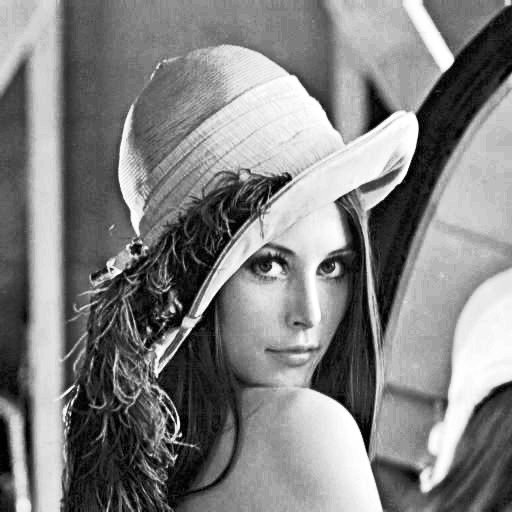

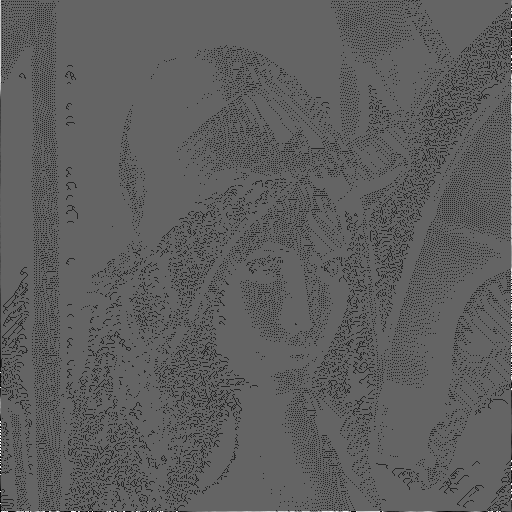

In [37]:
# Baca citra asli
image = cv2.imread("/content/sample_data/lena_lc.jpg", cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv2.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 235

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram dari gambar grayscale dan hasil equalization
histo_gray = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
histo_equalized = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

# Tampilkan histogram dalam bentuk bar
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Histogram Grayscale')
plt.bar(np.arange(256), histo_gray.flatten(), color='black')
plt.xlim([0, 256])

plt.subplot(2, 1, 2)
plt.title('Histogram Equalization')
plt.bar(np.arange(256), histo_equalized.flatten(), color='black')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()
print(" ")

# Tampilkan hasil gambar
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(dithered_image)

plt.show()